# Prediction using Supervised ML

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [31]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
print(data.isnull().sum())
data.describe()

Hours     0
Scores    0
dtype: int64


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


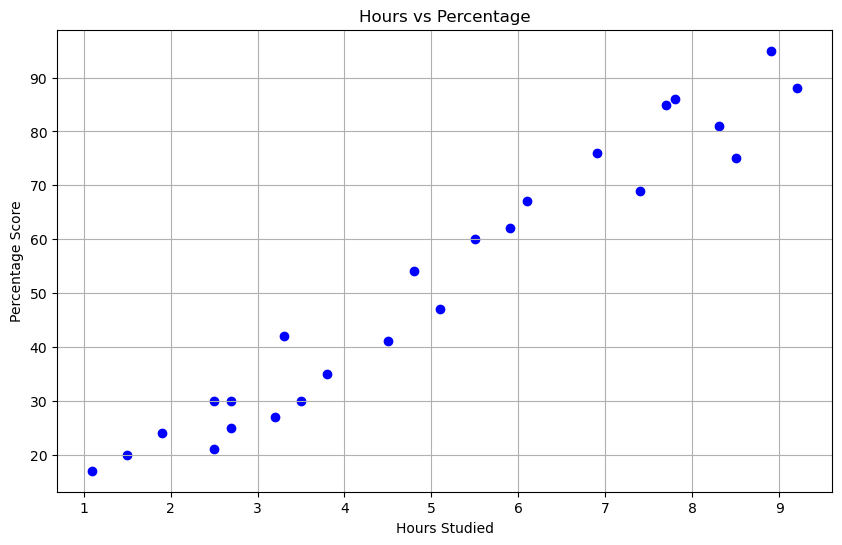

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

In [34]:

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [35]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")


Training complete.


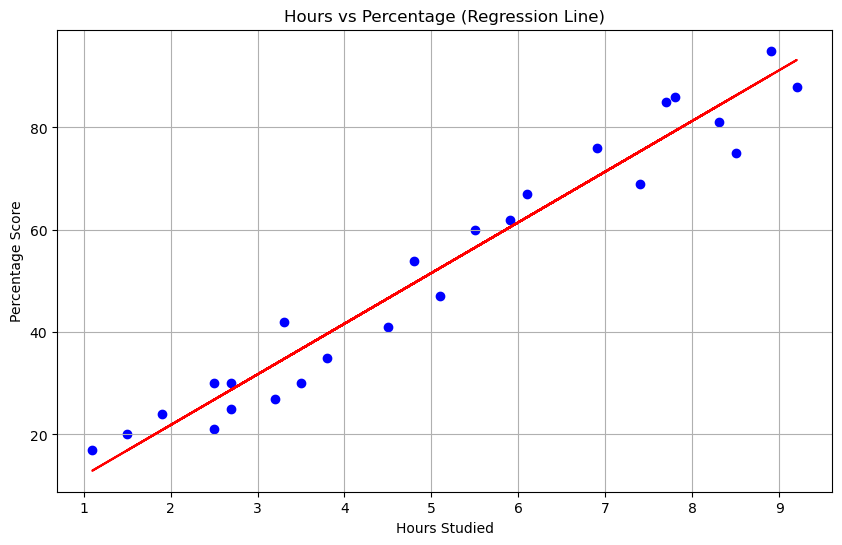

In [36]:

line = regressor.coef_ * X + regressor.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, line, color='red')
plt.title('Hours vs Percentage (Regression Line)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()


In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [39]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f'If a student studies for {hours} hours/day, the predicted score is {predicted_score[0]:.2f}')

If a student studies for 9.25 hours/day, the predicted score is 93.69
